In [1]:
include("all_code/code_needed.jl")
include("all_code/methods.jl")
# example:
r = 3; #three communities for now
n0 = [100,100,100] #number of nodes in each community
p = 0.9 #whithin community
q = 0.1 #between communities
A,communities = generate_SBM_data(r,n0,p,q)
M = create_subnetworks(A,r,n0)
# M has 6 matrices as follows:
# 1 x x
# 2 3 x
# 4 5 6
# M[i] = the block number in the above picture

M0 = A
M1 = vcat(hcat(spzeros(M[1]),M[2]',M[4]'),hcat(M[2],spzeros(M[3]),M[5]'),hcat(M[4],M[5],spzeros(M[6])))
# M1 has the same matrix with zero matrices on the diagonal
;

In [8]:
all_aucs_new = general_double_seed_idea_all_methods(
    M,
    n0,
    "edge",#"edge","triangle"
    0.25,
    0.8,
    A);

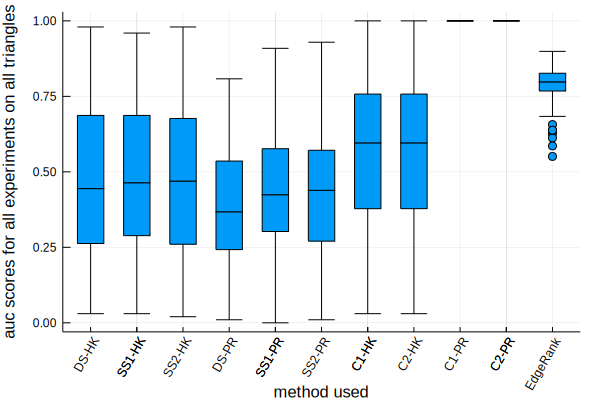

In [9]:
aucvals = all_aucs_new
boxplot(["DS-HK" "SS1-HK" "SS2-HK" "DS-PR" "SS1-PR" "SS2-PR" "C1-HK" "C2-HK" "C1-PR" "C2-PR" "EdgeRank"],aucvals, legend = false,color=1)
xlabel!("method used")
ylabel!("auc scores for all experiments on all triangles")
plot!(xrotation=60)

In [10]:
all_aucs_new = general_double_seed_idea_all_methods(
    M,
    n0,
    "wedge",#"edge","triangle"
    0.1,
    0.8,
    A);